<a href="https://colab.research.google.com/github/smartgrids-aau/GreenCodesPython/blob/main/Exemple_1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

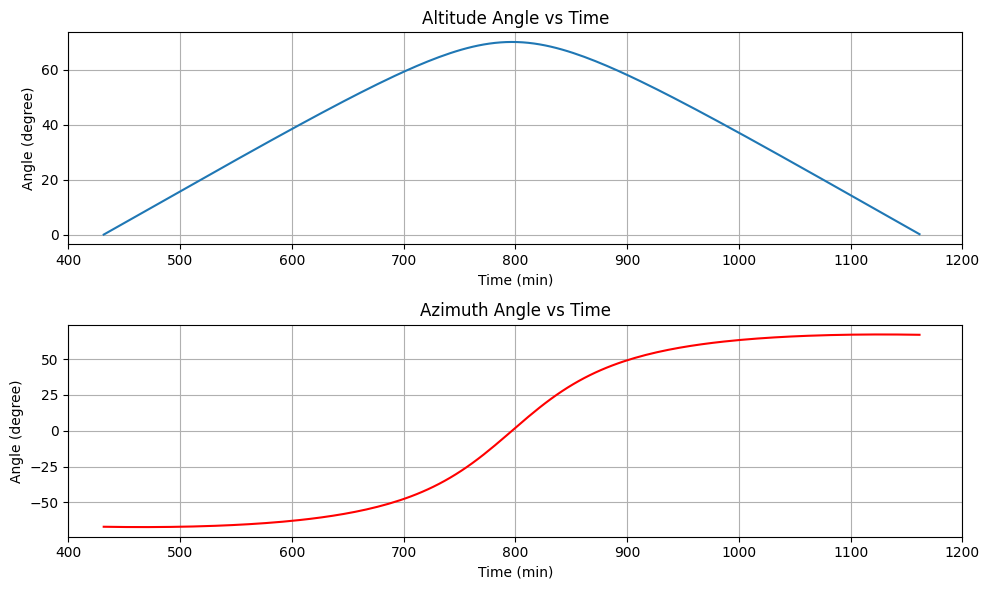

In [11]:
#Example 1.2

import math
import numpy as np
import matplotlib.pyplot as plt

# Example 1.2
#---------------------------------------------------------
# Location Kuala Lumpur, Malaysia, L =(3.12), LOD = (101.7)
# Actual solar day time 07:11 to 19:22

L = 3.12  # altitude
LOD = 101.7  # longitude
N = 183  # Day Number
T_GMT = 8  # Time difference with reference to GMT
Step = 5

# Angle of declination
Ds = 23.45 * math.sin((360 * (N - 81) / 365) * (math.pi / 180))

# LMST
Lzt = 15 * T_GMT

# Equation of Time
B = (360 * (N - 81)) / 364
EoT = (9.87 * math.sin(2 * B * math.pi / 180)) - \
      (7.53 * math.cos(B * math.pi / 180)) - \
      (1.5 * math.sin(B * math.pi / 180))

# Solar time correction
if LOD >= 0:
    Ts_correction = (-4 * (Lzt - LOD)) + EoT
else:
    Ts_correction = (4 * (Lzt - LOD)) + EoT

# Sunrise/Sunset hour angle
Wsr_ssi = -math.tan(Ds * math.pi / 180) * math.tan(L * math.pi / 180)
Wsrsr_ss = math.degrees(math.acos(Wsr_ssi))

# Sunrise and Sunset apparent solar times
ASTsr = abs(((Wsrsr_ss / 15) - 12) * 60)
ASTss = ((Wsrsr_ss / 15) + 12) * 60

# Sunrise and Sunset local times
Tsr = ASTsr + abs(Ts_correction)
Tss = ASTss + abs(Ts_correction)

Alpha = []
Theta = []
Time = []

# For loop for daytime solar calculations
LMT = Tsr
while LMT <= Tss:
    Ts = LMT + Ts_correction
    Hs = (15 * (Ts - (12 * 60))) / 60  # Hour angle

    sin_Alpha = (math.sin(L * math.pi / 180) * math.sin(Ds * math.pi / 180)) + \
                (math.cos(L * math.pi / 180) * math.cos(Ds * math.pi / 180) * math.cos(Hs * math.pi / 180))

    Alpha_i = math.degrees(math.asin(sin_Alpha))
    Alpha.append(Alpha_i)

    Sin_Theta = (math.cos(Ds * math.pi / 180) * math.sin(Hs * math.pi / 180)) / math.cos(Alpha_i * math.pi / 180)
    Theta_i = math.degrees(math.asin(Sin_Theta))
    Theta.append(Theta_i)

    Time.append(LMT)  # Store current time in minutes
    LMT += Step

# Plot results
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(Time, Alpha, label='Altitude (Alpha)')
plt.xlabel('Time (min)')
plt.ylabel('Angle (degree)')
plt.title('Altitude Angle vs Time')
plt.grid(True)
plt.xlim(400, 1200)

plt.subplot(2, 1, 2)
plt.plot(Time, Theta, color='red', label='Azimuth (Theta)')
plt.xlabel('Time (min)')
plt.ylabel('Angle (degree)')
plt.title('Azimuth Angle vs Time')
plt.grid(True)
plt.xlim(400, 1200)

plt.tight_layout()
plt.show()
